In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


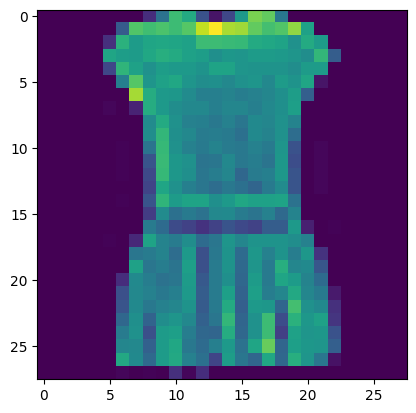

In [ ]:
plt.imshow(x_train[3])

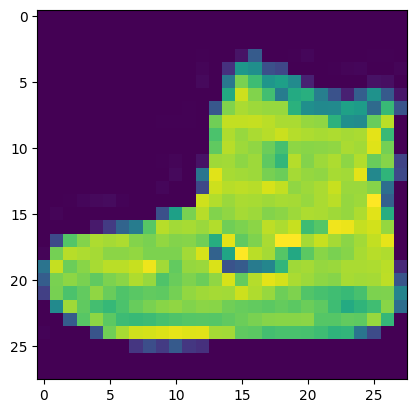

In [ ]:
plt.imshow(x_train[0])

In [ ]:

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.5411 - accuracy: 0.8015 - val_loss: 0.3625 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3551 - accuracy: 0.8697 - val_loss: 0.3338 - val_accuracy: 0.8777
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3139 - accuracy: 0.8852 - val_loss: 0.2933 - val_accuracy: 0.8923
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2891 - accuracy: 0.8934 - val_loss: 0.2723 - val_accuracy: 0.8992
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2714 - accuracy: 0.8990 - val_loss: 0.2632 - val_accuracy: 0.9039
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2602 - accuracy: 0.9023 - val_loss: 0.2599 - val_accuracy: 0.9030
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2480 - accuracy: 0.9081 - val_loss: 0.2537 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 [==============================] - 5s 15ms/step - loss: 0.2409 - accuracy: 0.9108
Test accuracy: 0.9107999801635742
